# Bellabeat Analysis

by Edgar Covantes Osuna

## Content

This repository contains two solutions for the Google Data Analytics Capstone: Complete a Case Study, as part of the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics).

The task titled "Case Study 2: How Can a Wellness Technology Company Play It Smart?" consists of analyzing a case similar to what you might be asked for in a job interview.

The current repository contains several files and one folder used in the present analysis. Among the files included, there is a PDF containing the information related to the case study, the history and background.

Two solutions presented in a Python and R Jupiter Notebooks (feel free to run them using Kaggle). Finally, a folder called `reports` where all the final reports are stored.

## Scenario

The scenario is based on a company called Bellabeat, a high-tech manufacturer of health-focused products for women. The **hypothesis** is that the cofounder and Chief Creative Officer believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

To do this, you have been asked to focus on one of Bellabeat's products and analyze smart device data to gain insight into how consumers are using their smart devices. Among the data collected you can find data on activity, sleep, stress, and reproductive health to gain knowledge about their own health and habits.

The **goal** is analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, provide high-level recommendations for how these trends can inform Bellabeat marketing strategy. And to achieve such goal the cofounder and Chief Creative Officer asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. Then she wants you to select one Bellabeat product to apply these insights to in your presentation.

These are the research questions that will guide the analysis:

1.  What are some trends in smart device usage?
2.  How could these trends apply to Bellabeat customers?
3.  How could these trends help influence Bellabeat marketing strategy?

## Obtaining the data set

Based on the case study definition, we make use of the [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) available in Kaggle. This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users' habits.

Also, as part of the problem definition, it is recommended to consider adding another data to help address some limitations the data set may have.

## Loading libraries

Next we define a few libraries what we will need through the whole project.

In [1]:
# Collection of R libraries designed for data science
library(tidyverse)

# Package used to manage conflicts (manage ambiguity with packages)
library(conflicted)

# Package for declaratively creating graphics
library(ggplot2)

# Package used to provide cross-platform interface to file system operations
library(fs)

# Extends 'ggplot2' by adding several functions to reduce the complexity of combining geometric objects with transformed data.
library(GGally)

# A graphical display of a correlation matrix using ggplot2
library(ggcorrplot)

# Provides the internal scaling infrastructure used by ggplot2
library(scales)

# Provides a number of user-level functions to work with "grid" graphics
library(gridExtra)

# Provides geoms for ggplot2 to repel overlapping text labels
library(ggrepel)

# Declaring filter and lag from the package dplyr as default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


## Loading data-sets

Before we start working on the downloaded data-sets, let us first detailed how the data set is structured:

In [2]:
dir_tree(path = "../input")

../input
└── fitbit
    ├── mturkfitbit_export_3.12.16-4.11.16
    │   └── Fitabase Data 3.12.16-4.11.16
    │       ├── dailyActivity_merged.csv
    │       ├── heartrate_seconds_merged.csv
    │       ├── hourlyCalories_merged.csv
    │       ├── hourlyIntensities_merged.csv
    │       ├── hourlySteps_merged.csv
    │       ├── minuteCaloriesNarrow_merged.csv
    │       ├── minuteIntensitiesNarrow_merged.csv
    │       ├── minuteMETsNarrow_merged.csv
    │       ├── minuteSleep_merged.csv
    │       ├── minuteStepsNarrow_merged.csv
    │       └── weightLogInfo_merged.csv
    └── mturkfitbit_export_4.12.16-5.12.16
        └── Fitabase Data 4.12.16-5.12.16
            ├── dailyActivity_merged.csv
            ├── dailyCalories_merged.csv
            ├── dailyIntensities_merged.csv
            ├── dailySteps_merged.csv
            ├── heartrate_seconds_merged.csv
            ├── hourlyCalories_merged.csv
            ├── hourlyIntensities_merged.csv
            ├── hourlySteps_merged

The data set is defined by two sub folders, the first sub folder called `mturkfitbit_export_3.12.16-4.11.16` contains another sub folder called `Fitabase Data 3.12.16-4.11.16` which in turn contains 11 CSV files. These CSV files correspond to the measures made from March 12, 2016 to April 11, 2016. The second sub folder contains a similar structure, but instead, it contains 18 CSV files with measures made from April 12, 2016 to May 12, 2016.

We will make use of both sub folders, but before let us use the content of sub folder `Fitabase Data 3.12.16-4.11.16` to make some observations with respect to the complete data set. Let us load first the files `dailyActivity_merged.csv` and `heartrate_seconds_merged.csv`, and compare their content.

In [3]:
daily_activity_1 <- read_csv('../input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv')

heartrate_seconds_1 <- read_csv('../input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv')

Rows: 457 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1154681 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Now lets check the columns names and first rows of each file:

In [4]:
head(daily_activity_1)
head(heartrate_seconds_1)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/1/2016 7:54:00 AM,93
2022484408,4/1/2016 7:54:05 AM,91
2022484408,4/1/2016 7:54:10 AM,96
2022484408,4/1/2016 7:54:15 AM,98
2022484408,4/1/2016 7:54:20 AM,100
2022484408,4/1/2016 7:54:25 AM,101


The first thing we can check here is that each file share some similarities, e.g., both files contain an `Id` variable, a date variable (these may not have the same name like in this case we have `ActivityDate` and `Time`, respectively). In some files the date variable have different measures, i.e., some dates only have a date and others include the time in hours, minutes and seconds but we can always group them by date.

Finally, the not shared variables correspond to an specific elements measured. It is by combining the information using the `Id` and date that we will make use of the complete data set to make our observations.

Now, lets load the `hourlyCalories_merged.csv`file to check other property.

In [5]:
hourly_calories_1 <- read_csv('../input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv')

head(hourly_calories_1)

Rows: 24084 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,3/12/2016 12:00:00 AM,48
1503960366,3/12/2016 1:00:00 AM,48
1503960366,3/12/2016 2:00:00 AM,48
1503960366,3/12/2016 3:00:00 AM,48
1503960366,3/12/2016 4:00:00 AM,48
1503960366,3/12/2016 5:00:00 AM,48


As you can see the `Id` and date are shared with other files (but in this case the date contains the time measured in hours instead of seconds like in `heartrate_seconds_merged.csv`). One thing this file has in common with `dailyActivity_merged.csv` is that they share the variable called `Calories`, `dailyActivity_merged.csv` has the total of calories in a day and `hourlyCalories_merged.csv` has the calories by hour but if we group the the calories by `Id` and the date in the `hourlyCalories_merged.csv` we can obtain the same result as in `dailyActivity_merged.csv`.

In [6]:
hourly_calories_group <- 
  mutate(hourly_calories_1, ActivityHour = format(as.Date(ActivityHour, "%m/%d/%Y"), "%m/%d/%Y")) %>% 
  group_by(Id, ActivityHour) %>% 
  summarise(Calories = sum(Calories))
head(hourly_calories_group)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,03/12/2016,2228
1503960366,03/13/2016,2100
1503960366,03/14/2016,1830
1503960366,03/15/2016,2111
1503960366,03/16/2016,1967
1503960366,03/17/2016,2039


Let is compare the results from `daily_activity_1` and `hourly_calories_group`:

In [7]:
merge(x = daily_activity_1, y = hourly_calories_group, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityHour'), all = TRUE)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories.x,Calories.y
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,03/12/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2228
1503960366,03/13/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2100
1503960366,03/14/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1830
1503960366,03/15/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2111
1503960366,03/16/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1967
1503960366,03/17/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2039
1503960366,03/18/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2002
1503960366,03/19/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2057
1503960366,03/20/2016,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2096


We can make two observations from the previous result. Note the `NA` values for several columns and rows, e.g., with `Id = 1503960366` and `ActivityDate = 03/12/2016` there are `NA` values for all columns except with `Calories.y` which corresponds to the `Calories` column from `hourly_calories_group`. This means that for `Id = 1503960366` and `ActivityDate = 03/12/2016` there is no data in the `daily_activity_1` data frame (or `dailyActivity_merged.csv` file), but when we check `Id = 1503960366` and `ActivityDate = 3/25/2016` we found values for all the data, except `Calories.y`.

The first observation is that there are more registers in the `hourlyCalories_merged.csv` file than in the `dailyActivity_merged.csv` file, that is why when trying to merge them by id and date, there is no information related to them in `dailyActivity_merged.csv`. The second observation is that there is a value in `Calories.y` (which corresponds to the sum of calories in a day in `hourlyCalories_merged.csv`) but no in `Calories.x`, this means that there is no value for in `dailyActivity_merged.csv` for that id and date, but when there is value in `Calories.x` but no in `Calories.y` it means that both values are the same, and the merge process has combined both results into `Calories.x`.

Let us manually check the first observations. First the number of rows per file:

In [8]:
nrow(daily_activity_1)
nrow(hourly_calories_group)

[1] 457

[1] 1021

This confirms the observation that `hourly_calories_group` has more registers than `daily_activity_1`. Second, let us check the calories for `Id = 1503960366` with date `03/12/2016` and `03/12/2016`.

In [9]:
filter(daily_activity_1, Id == 1503960366 & ActivityDate == '3/12/2016')
filter(hourly_calories_group, Id == 1503960366 & ActivityHour == '03/12/2016')

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,03/12/2016,2228


There is no result for `1503960366` and `03/12/2016` in the data frame `daily_activity_1` but there is a record in `hourly_calories_group`, but when we change the date to `03/25/2016` we get the following result

In [10]:
filter(daily_activity_1, Id == 1503960366 & ActivityDate == '3/25/2016')
filter(hourly_calories_group, Id == 1503960366 & ActivityHour == '03/25/2016')

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,03/25/2016,1819


Now we delete the data frames `hourly_calories_1` and `hourly_calories_group` since we do not have any use for them anymore.

In [11]:
rm(hourly_calories_1)
rm(hourly_calories_group)

Now we have results from both data frames, with the same value for `Calories` which means that our second observation was true, when there is the same record for both data frames, the record is combined in `Calories.x`. Finally, this highlight another property of the files, *there are records in some files that can be obtained/calculated from others*, which allow us to ignore some files, and use fewer files in our analysis.

Among the information that can be shared from the files in `fitbit\mturkfitbit_export_3.12.16-4.11.16\Fitabase Data 3.12.16-4.11.16` we can find

| File name                        | Shared Field |                                |              |            |                  |
|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|
| `dailyActivity_merged`           | `Id`         | `ActivityHour` (date hours)    | `TotalSteps` | `Calories` |                  |
| `heartrate_seconds_merged`       | `Id`         | `Time` (date seconds)          |              |            |                  |
| `hourlyCalories_merged`          | `Id`         | `ActivityHour` (date hours)    |              | `Calories` |                  |
| `hourlyIntensities_merged`       | `Id`         | `ActivityHour` (date hours)    |              |            | `TotalIntensity` |
| `hourlySteps_merged`             | `Id`         | `ActivityHour` (date hours)    | `StepTotal`  |            |                  |
| `minuteCaloriesNarrow_merged`    | `Id`         | `ActivityMinute` (date minute) |              | `Calories` |                  |
| `minuteIntensitiesNarrow_merged` | `Id`         | `ActivityMinute` (date minute) |              |            | `Intensity`      |
| `minuteMETsNarrow_merged`        | `Id`         | `ActivityMinute` (date minute) |              |            |                  |
| `minuteSleep_merged`             | `Id`         | `date` (date minute)           |              |            |                  |
| `minuteStepsNarrow_merged`       | `Id`         | `ActivityMinute` (date minute) | `StepTotal`  |            |                  |
| `weightLogInfo_merged`           | `Id`         |                                |              |            |                  |

With this, we can avoid loading files with repeated information and select only the ones with unique information, from this, we can go from 11 files to 6 files. And among the information shared from the files in `fitbit\mturkfitbit_export_4.12.16-5.12.16\Fitabase Data 4.12.16-5.12.16` we can find:

| File name                        | Shared Field |                                |              |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|
| `dailyActivity_merged`           | `Id`         | `ActivityDate` (date)          | `TotalSteps` | `VeryActiveDistance` | `ModeratelyActiveDistance` | `LightActiveDistance` | `SedentaryActiveDistance` | `VeryActiveMinutes` | `FairlyActiveMinutes` | `LightlyActiveMinutes` | `SedentaryMinutes` | `Calories` |                  |
| `dailyCalories_merged`           | `Id`         | `ActivityDay` (date)           |              |                      |                            |                       |                           |                     |                       |                        |                    | `Calories` |                  |
| `dailyIntensities_merged`        | `Id`         | `ActivityDay` (date)           |              | `VeryActiveDistance` | `ModeratelyActiveDistance` | `LightActiveDistance` | `SedentaryActiveDistance` | `VeryActiveMinutes` | `FairlyActiveMinutes` | `LightlyActiveMinutes` | `SedentaryMinutes` |            |                  |
| `dailySteps_merged`              | `Id`         | `ActivityDay` (date)           | `StepTotal`  |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `heartrate_seconds_merged`       | `Id`         | `Time` (date second)           |              |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `hourlyCalories_merged`          | `Id`         | `ActivityHour` (date hour)     |              |                      |                            |                       |                           |                     |                       |                        |                    | `Calories` |                  |
| `hourlyIntensities_merged`       | `Id`         | `ActivityHour` (date hour)     |              |                      |                            |                       |                           |                     |                       |                        |                    |            | `TotalIntensity` |
| `hourlySteps_merged`             | `Id`         | `ActivityHour` (date hour)     | `StepTotal`  |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `minuteCaloriesNarrow_merged`    | `Id`         | `ActivityMinute` (date minute) |              |                      |                            |                       |                           |                     |                       |                        |                    | `Calories` |                  |
| `minuteCaloriesWide_merged`      | `Id`         | `ActivityHour` (date minute)   |              |                      |                            |                       |                           |                     |                       |                        |                    | `Calories` |                  |
| `minuteIntensitiesNarrow_merged` | `Id`         | `ActivityMinute` (date minute) |              |                      |                            |                       |                           |                     |                       |                        |                    |            | `Intensity`      |
| `minuteIntensitiesWide_merged`   | `Id`         | `ActivityHour` (date hour)     |              |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `minuteMETsNarrow_merged`        | `Id`         | `ActivityMinute` (date minute) |              |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `minuteSleep_merged`             | `Id`         | `date` (date minute)           |              |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `minuteStepsNarrow_merged`       | `Id`         | `ActivityMinute` (date minute) | `Steps`      |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `minuteStepsWide_merged`         | `Id`         | `ActivityMinute` (date hour)   | `Steps`      |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `sleepDay_merged`                | `Id`         | `SleepDay` (date)              |              |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |
| `weightLogInfo_merged`           | `Id`         |                                |              |                      |                            |                       |                           |                     |                       |                        |                    |            |                  |

And again, if we take advantage of the content in file `dailyActivity_merged` we can go from 18 files to 9 files. And we can go even further since the file `minuteIntensitiesWide_merged`, is a wider version (with repeated information) of the file `minuteIntensitiesNarrow_merged`. So by not considering `minuteIntensitiesWide_merged` in our analysis we end up with 8 files to analyze.

Also we are going to ignore the files named `weightLogInfo_merged` and `weightLogInfo_merged` since they do not provide information related to the how consumers are using smart devices. Those files seems to contain control data about the weight, BMI, Fat of each Id.

**NOTE:** During a preliminary analysis we found that for the record `Id=1503960366` in `dailyActivity_merged` from `Fitabase Data 4.12.16-5.12.16` has `Calories=1985` but the calories reported in `hourlyCalories_merged` is `1988`, another discrepancy found was with `dailyActivity_merged$TotalSteps=13162` and `hourlySteps_merged$StepTotal=13158`. Based on what is written in the data set definition *Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors/preferences.* So we are going to ignore this differences.

## Transforming and cleaning the data set

Based on the observations/comments done previously, these are the selected files for our analysis:

| `Fitabase Data 3.12.16-4.11.16` | `Fitabase Data 4.12.16-5.12.16` |
|:--------------------------------|:--------------------------------|
| `dailyActivity_merged`          | `dailyActivity_merged`          |
| `heartrate_seconds_merged`      | `heartrate_seconds_merged`      |
| `hourlyIntensities_merged`      | `hourlyIntensities_merged`      |
| `minuteMETsNarrow_merged`       | `minuteMETsNarrow_merged`       |
| `minuteSleep_merged`            | `minuteSleep_merged`            |
|                                 | `sleepDay_merged`               |

We are going to start merging the corresponding files for `Fitabase Data 3.12.16-4.11.16` and `Fitabase Data 4.12.16-5.12.16`. Starting with `Fitabase Data 3.12.16-4.11.16`. Recall that we have already loaded the files from `Fitabase Data 3.12.16-4.11.16`:

-   `dailyActivity_merged` into data frame `daily_activity_1`,
-   `heartrate_seconds_merged` into data frame `heartrate_seconds_1`,

Now we are loading the other data frames and remove the ones we do not need anymore

In [12]:
hourly_intensities_1 <- read_csv('../input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv')
minute_METs_1 <- read_csv('../input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv')
minute_sleep_1 <- read_csv('../input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv')

Rows: 24084 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1445040 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityMinute
dbl (2): Id, METs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 198559 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): date
dbl (3): Id, value, logId

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Now based on the tables defined before, the loaded files contain a date variable, these may change depending the feature measured, e.g., `heartrate_seconds_1` contains the hearth rate by seconds, `hourly_intensities` by hours, the only think they share is the date with format `%m/%d/Y`, so we are going to make our analysis by date only.

Let us rename the date column in all files to `ActivityDate`, set the date to format `%m/%d/Y` and group the rows by `Id` and `ActivityDate`, so we can merge them based later.

In [13]:
daily_activity_1 <-
  daily_activity_1 %>% 
  mutate(daily_activity_1, ActivityDate = format(as.Date(ActivityDate, "%m/%d/%Y"), "%m/%d/%Y"))

heartrate_seconds_1 <-
  heartrate_seconds_1 %>%
  mutate(heartrate_seconds_1, Time = format(as.Date(Time, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = Time) %>%
  group_by(Id, ActivityDate) %>%
  summarise(HeartRate = sum(Value))
 
hourly_intensities_1 <-
  hourly_intensities_1 %>% 
  select(-AverageIntensity) %>% 
  mutate(hourly_intensities_1, ActivityHour = format(as.Date(ActivityHour, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = ActivityHour) %>% 
  group_by(Id, ActivityDate) %>% 
  summarise(TotalIntensity = sum(TotalIntensity))

minute_METs_1 <-
  minute_METs_1 %>% 
  mutate(minute_METs_1, ActivityMinute = format(as.Date(ActivityMinute, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = ActivityMinute) %>% 
  group_by(Id, ActivityDate) %>% 
  summarise(METs = sum(METs))

minute_sleep_1 <-
  minute_sleep_1 %>% 
  select(-logId) %>% 
  mutate(minute_sleep_1, date = format(as.Date(date, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = date) %>% 
  group_by(Id, ActivityDate) %>% 
  summarise(MinuteSleep = sum(value))

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Once we have all date columns with the same name and format we can start merging the data in a single data frame.

In [14]:
fitabase_data_1 <- merge(x = daily_activity_1, y = heartrate_seconds_1, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)
fitabase_data_1 <- merge(x = fitabase_data_1, y = hourly_intensities_1, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)
fitabase_data_1 <- merge(x = fitabase_data_1, y = minute_METs_1, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)
fitabase_data_1 <- merge(x = fitabase_data_1, y = minute_sleep_1, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)

Let's continue with the files in `Fitabase Data 4.12.16-5.12.16`

In [15]:
daily_activity_2 <- read_csv('../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
heartrate_seconds_2 <- read_csv('../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')
hourly_intensities_2 <- read_csv('../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
minute_METs_2 <- read_csv('../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')
minute_sleep_2 <- read_csv('../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')
sleep_day_2 <- read_csv('../input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FAL

And as we did previously, let us rename the date column in all files to `ActivityDate`, set the date to format `%m/%d/Y` and group the rows by `Id` and `ActivityDate`, so we can merge them.

In [16]:
daily_activity_2 <- 
  daily_activity_2 %>% 
  mutate(daily_activity_2, ActivityDate = format(as.Date(ActivityDate, "%m/%d/%Y"), "%m/%d/%Y"))

heartrate_seconds_2 <-
  heartrate_seconds_2 %>%
  mutate(heartrate_seconds_2, Time = format(as.Date(Time, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = Time) %>%
  group_by(Id, ActivityDate) %>%
  summarise(HeartRate = sum(Value))
 
hourly_intensities_2 <-
  hourly_intensities_2%>% 
  select(-AverageIntensity) %>% 
  mutate(hourly_intensities_2, ActivityHour = format(as.Date(ActivityHour, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = ActivityHour) %>% 
  group_by(Id, ActivityDate) %>% 
  summarise(TotalIntensity = sum(TotalIntensity))

minute_METs_2 <-
  minute_METs_2 %>% 
  mutate(minute_METs_2, ActivityMinute = format(as.Date(ActivityMinute, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = ActivityMinute) %>% 
  group_by(Id, ActivityDate) %>% 
  summarise(METs = sum(METs))

minute_sleep_2 <-
  minute_sleep_2 %>% 
  select(-logId) %>% 
  mutate(minute_sleep_2, date = format(as.Date(date, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = date) %>% 
  group_by(Id, ActivityDate) %>% 
  summarise(MinuteSleep = sum(value))

sleep_day_2 <-
  sleep_day_2 %>% 
  mutate(sleep_day_2, SleepDay = format(as.Date(SleepDay, "%m/%d/%Y"), "%m/%d/%Y")) %>%
  rename(ActivityDate = SleepDay) %>% 
  group_by(Id, ActivityDate) 

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Finally, we combine all the data into a single data frame.

In [17]:
fitabase_data_2 <- merge(x = daily_activity_2, y = heartrate_seconds_2, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)
fitabase_data_2 <- merge(x = fitabase_data_2, y = hourly_intensities_2, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)
fitabase_data_2 <- merge(x = fitabase_data_2, y = minute_METs_2, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)
fitabase_data_2 <- merge(x = fitabase_data_2, y = minute_sleep_2, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)
fitabase_data_2 <- merge(x = fitabase_data_2, y = sleep_day_2, by.x = c('Id', 'ActivityDate'), by.y = c('Id', 'ActivityDate'), all = TRUE)

Observe that we have more columns in data frame `fitabase_data_2` than `fitabase_data_1` (22, 19, respectively). This is due to the extra data frame called `sleep_day_2` in which such information is not available for the records in `Fitabase Data 3.12.16-4.11.16` are not available, but in the following we will keep them so we can compare the records who has them available.

In [18]:
ncol(fitabase_data_1)
ncol(fitabase_data_2)

[1] 19

[1] 22

Once we have all the information into their respective data frames, now we can create a full data set containing all records, from `fitabase_data_1` and `fitabase_data_2`

In [19]:
full_fitabase_data <- bind_rows(fitabase_data_1, fitabase_data_2)
full_fitabase_data <- mutate(full_fitabase_data, Id = as.character(Id))

## Descriptive analysis

Now that we have transformed and cleaned the data we are ready to focus on answering the research questions. Let's start with some descriptive statistics.

In [20]:
summary(full_fitabase_data)

      Id            ActivityDate         TotalSteps    TotalDistance   
 Length:2011        Length:2011        Min.   :    0   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 3147   1st Qu.: 2.185  
 Mode  :character   Mode  :character   Median : 7012   Median : 4.950  
                                       Mean   : 7291   Mean   : 5.229  
                                       3rd Qu.:10565   3rd Qu.: 7.510  
                                       Max.   :36019   Max.   :28.030  
                                       NA's   :611     NA's   :611     
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.160   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 4.950   Median :0.0000           Median : 0.105    
 Mean   : 5.202   Mean   :0.1327           Mean   : 1.399    
 3rd Qu.: 7.492   3rd Qu.:0.0000           3rd Qu.: 1.835    
 Max.   :28.030   Max.   :6.7271           Max.   :2

From the previous summary it is clearer that not all users participated in all activities, this due to the `NA's` values mentioned before. In anyway we will use the information from `full_fitabase_data` to see the relationship between variables.

For example, let us check the relationship between `TotalSteps` and `SedentaryMinutes`:

Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”


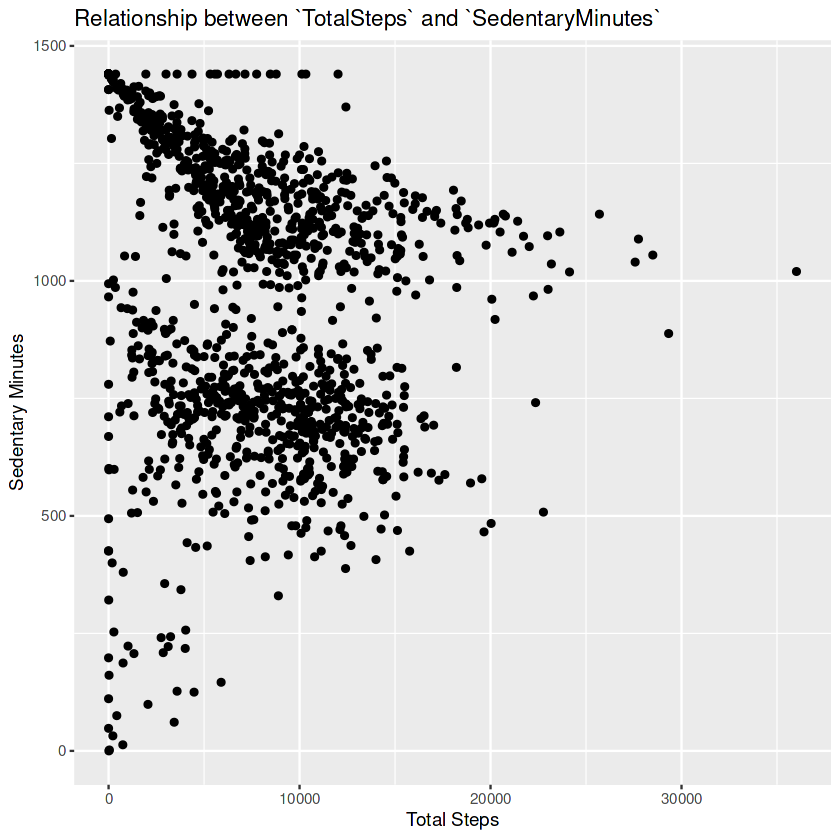

In [21]:
ggplot(data=full_fitabase_data, aes(x=TotalSteps, y=SedentaryMinutes)) + 
  geom_point() +
  labs(title = "Relationship between `TotalSteps` and `SedentaryMinutes`",
       x = 'Total Steps',
       y = 'Sedentary Minutes')

Based on the graph, there is no apparent relationship among these two variables, now let's check the relationship between `TotalMinutesAsleep` and `TotalTimeInBed`:

Warning message:
“Removed 1598 rows containing missing values (`geom_point()`).”


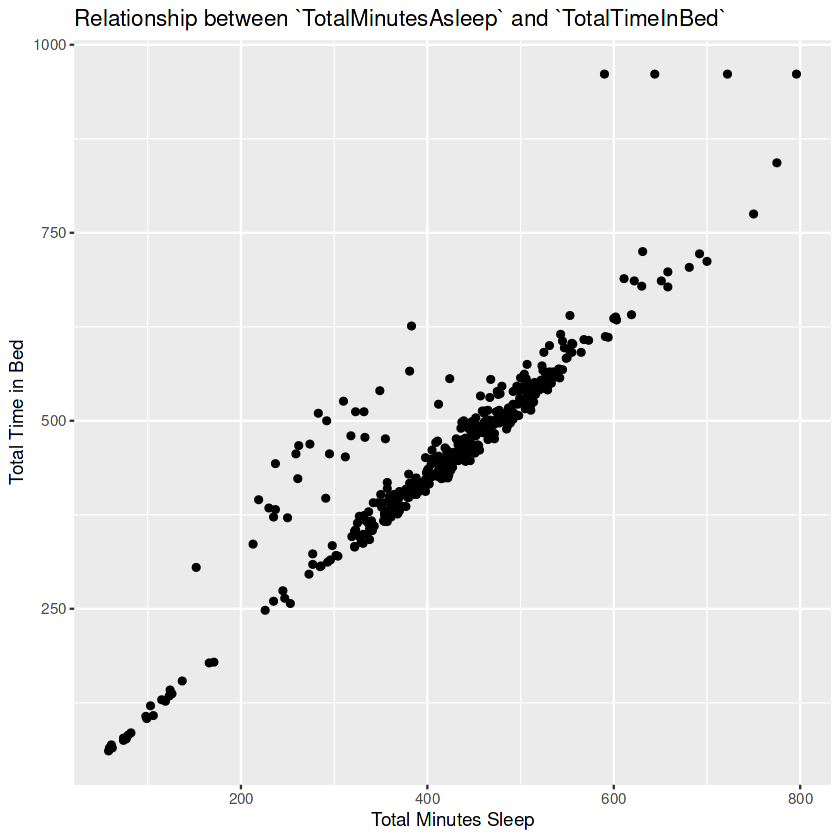

In [22]:
ggplot(data=full_fitabase_data, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point() +
  labs(title = "Relationship between `TotalMinutesAsleep` and `TotalTimeInBed`",
       x = 'Total Minutes Sleep',
       y = 'Total Time in Bed')

In this example we see a positive correlation between both variables, which makes sense if we think that the more we sleep, the more time we spend in bed.

Based on the previous ideas, we will create a heat map containing a correlation test (recall that a correlation test is used to investigate the dependence between multiple variables at the same time). We are going to start by removing the `Id` and `ActivityDate` columns since we are interested in all other variables.

In [23]:
cor_fitabase_data <- 
  full_fitabase_data %>% 
  select(-c(Id, ActivityDate))

Now, instead of comparing variables like we did previously with `TotalSteps` vs `SedentaryMinutes` and `TotalMinutesAsleep` vs `TotalTimeInBed` we can compare them all at the same time. Unfortunately, due to the amount of variables the following image may look too small, we recommend to print to save this plot and review it using a Zoom In and panning tool.

Warning message:
“Removed 611 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 611 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 611 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 611 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 611 rows containing missing values (`geom_point()`).”
Warning message:
“Re

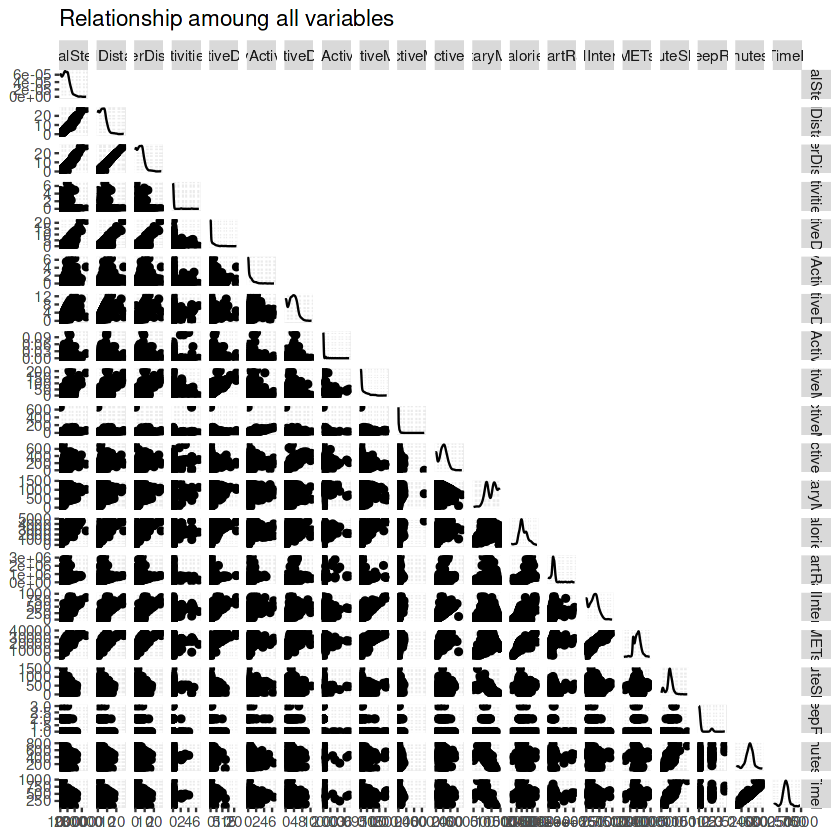

In [24]:
ggpairs(cor_fitabase_data, upper = "blank") +
  labs(title = 'Relationship amoung all variables')

Now we calculate obtain correlation matrix which tells us how dependent is a variable from the other. Remember

-   1 and -1 means a stronger dependence (positive and negative).
    -   A positive correlation means "if one variable increases, the other one also increases".
    -   A negative correlation means "if one variable increases, the other decreases".
-   0 means no correlation.

In [25]:
cor_map_fitabase_data <- round(cor(cor_fitabase_data, method = "pearson", use = "pairwise.complete.obs"), 1)
p.mat <- cor_pmat(cor_fitabase_data)

Then we plot the correlation matrix so we can check the relationship among all variables and remove the pair of variables considered as insignificant.

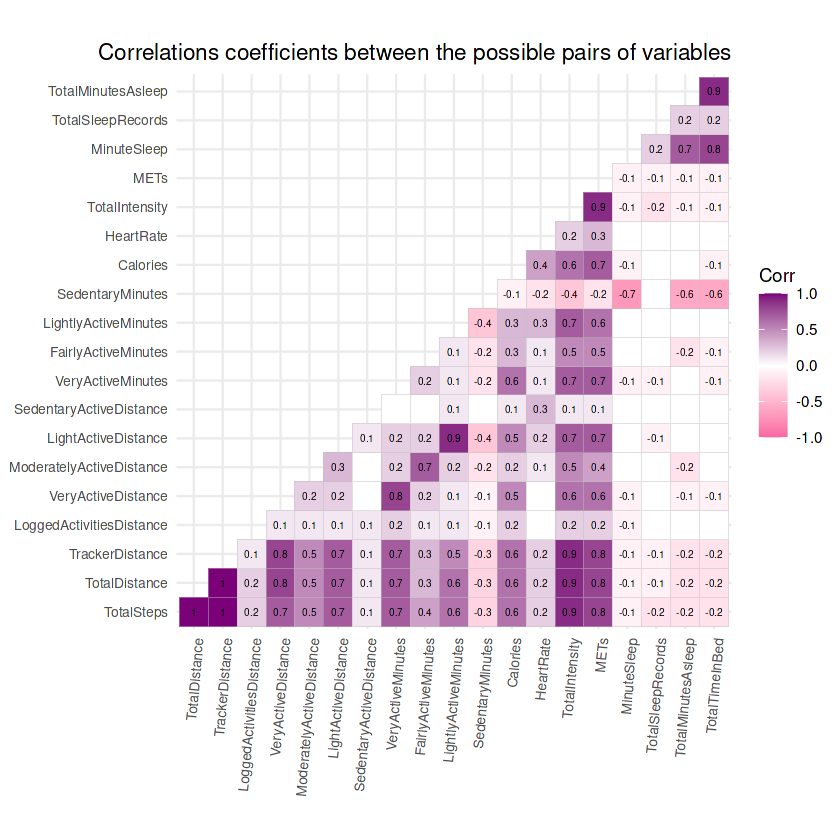

In [26]:
ggcorrplot(cor_map_fitabase_data, 
           p.mat = p.mat, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 2, 
           colors = c("#f768a1", "white", "#7a0177"),
           insig = "blank",
           title = "Correlations coefficients between the possible pairs of variables") +
  theme(axis.text.x = element_text(angle = 85, size = 8),
        axis.text.y = element_text(size = 8),
        plot.title = element_text(hjust = 1))

Let us review the previous comparisons `TotalSteps` vs `SedentaryMinutes`, and `TotalMinutesAsleep` vs `TotalTimeInBed` and check if we can draw the same conclusions using the correlation matrix plot. If we check the previous `TotalSteps` vs `SedentaryMinutes` we see a correlation coefficient of -0.3, a weak correlation but still a significant negative correlation. And if we check `TotalMinutesAsleep` vs `TotalTimeInBed` we observe correlation coefficient of 0.9, which indicates a significant and strong correlation between these two variables.

From the previous results it seems that there is a strong positive correlation between the variables, `TotalSteps`, `TotalDistance`, `TrackerDistance`, `VeryActiveDistance`, `ModeratelyActiveDistance`, `LightActiveDistance`, `VeryActiveMinutes`, `LightlyActiveMinutes`, `Calories`, `TotalIntensity` and `METs`, this makes sense since more steps imply being more active distance and minutes invested, and the more active is the person, the more calories it burns.

We can also see this behavior in a different way with a negative correlation with respect to `SedentaryMinutes` vs `TotalSteps`, `TotalDistance`, `TrackerDistance`, `ModeratelyActiveDistance`, `LightActiveDistance`, `VeryActiveMinutes`, and `LightlyActiveMinutes`. Which indicates that the more activity an individual perform, the less time a person spends idle.

Aside from that, it is worth nothing that several correlation coefficients from certain variables were removed since were considered insignificant, and most of them belong to the data set called `sleepDay_merged`. That data set only contained observations of a reduced number of users and it seems that does not share connections with other variables aside from the ones in the same data set like `TotalTimeInBed`, `TotalMinutesAsleep` and `MinuteSleep`.

But according to the correlations coefficients it seems to be a negative correlation between `MinuteSleep` and the variables `VeryActiveDistance`, `VeryActiveMinutes`, `SedentaryMinutes` and `Calories`, which indicates that the less sleeping time, the more active the person is, is may be an indicator that people prefer doing more time doing exercise than going to sleep. Then, at what time the more active people is going to sleep? And the more sedentary people are going to sleep less, why? What are they doing during the day that they do not sleep that much?

## Recomendations

Based on the previous results, these are the recommendations for the research questions made previously.

### 1. What are some trends in smart device usage?

Based on the comments done previously, let us see what is the percentage of users in the following categories:

1.  `VeryActiveDistance`, `ModeratelyActiveDistance`, `LightActiveDistance`, `SedentaryActiveDistance`:

In [27]:
piv_1 <- full_fitabase_data %>% 
  summarise('Very Active Distance' = sum(VeryActiveDistance, na.rm=T),
            'Moderately Active Distance' = sum(ModeratelyActiveDistance, na.rm=T),
            'Light Active Distance' = sum(LightActiveDistance, na.rm=T),
            'Sedentary Active Distance' = sum(SedentaryActiveDistance, na.rm=T)) %>% 
  pivot_longer(cols = everything(), names_to = 'activity', values_to = 'value') %>% 
  mutate(prop = value / sum(value) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop ) %>% 
  mutate(perc = percent(prop / 100))

p1 <- ggplot(piv_1, aes(x = "", y = prop, fill = activity)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  #geom_text(aes(y = ypos, label = perc), color = "black", size=4) +
  geom_label_repel(aes(y = ypos, label = perc), size = 4, nudge_x = 1, show.legend = FALSE) +
  theme_void() +
  scale_fill_brewer(palette="RdPu", direction = -1) +
  guides(fill=guide_legend(title="Active")) +
  labs(title = 'Active Distance')

2.  `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes`, and `SedentaryMinutes`:

In [28]:
piv_2 <- full_fitabase_data %>% 
  summarise('Very Active Minutes' = sum(VeryActiveMinutes, na.rm=T),
            'Fairly Active Minutes' = sum(FairlyActiveMinutes, na.rm=T),
            'Light Active Minutes' = sum(LightlyActiveMinutes, na.rm=T),
            'Sedentary Minutes' = sum(SedentaryMinutes, na.rm=T)) %>% 
  pivot_longer(cols = everything(), names_to = 'activity', values_to = 'value') %>% 
  mutate(prop = value / sum(value) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop ) %>% 
  mutate(perc = percent(prop / 100))

p2 <- ggplot(piv_2, aes(x = "", y = prop, fill = activity)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  #geom_text(aes(label = perc), color = "black", size=4, position=position_stack(vjust=1)) +
  geom_label_repel(aes(y = ypos, label = perc), size = 4, nudge_x = 1, show.legend = FALSE) +
  theme_void() +
  scale_fill_brewer(palette="RdPu", direction = -1) +
  guides(fill=guide_legend(title="Minutes")) +
  labs(title = 'Active Minutes')

Now let us compare both plots.

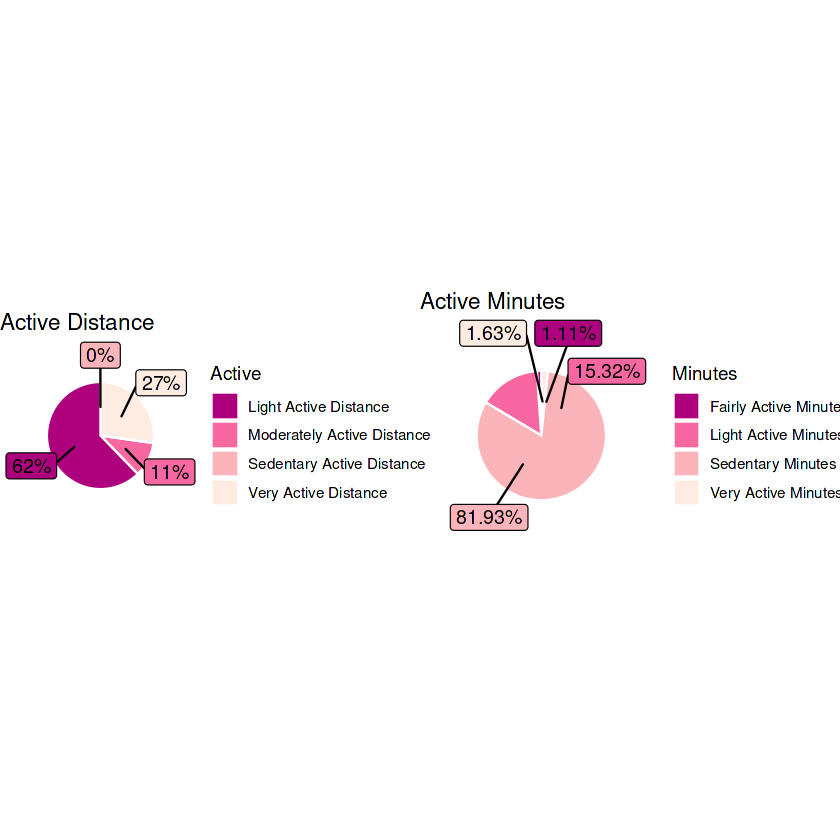

In [29]:
grid.arrange(p1, p2, nrow = 1)

It is easy to observe that the highest percentage of people doing some kind of activity are the ones with light active distance followed by the ones very active distance. From the active minutes, the most predominant are the ones from sedentary minutes followed by light active minutes. From here we can see that not a lot of people spent time doing activities, it is more predominant the people that prefers to do some kind of light activities.

### 2. How could these trends apply to Bellabeat customers?

The previous trends can be useful to monitor carefully the measurement of experiments, for example, we can observe that the participation for the sleep experiments is insignificant, since we do not have enough participation, these values were considered as not correlated with other variables. So it would be necessary to pay more attention and increase the participation.

With that in mind, Bellabeat should encourage people to be more active by providing some kind of rewards to those who agree to participate or reaches a certain milestone, such as achieving a certain number of steps, minimum minutes with very active distance and minutes, achieving a certain number of sleeping minutes.

### 3. How could these trends help influence Bellabeat marketing strategy?

By creating a marketing strategy that promotes the people's participation, but also convert those participants from light active distance and fair active minutes to more active categories. Also, try to suggest some home activities to try to reduce the percentage of sedentary minutes. 

### Future explorations

So for future explorations we would like to check on a weekly basis, which days of the week and when people is more active to try to understand what is the time period in which people is more/less active. Take for instance the following 3 Ids

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


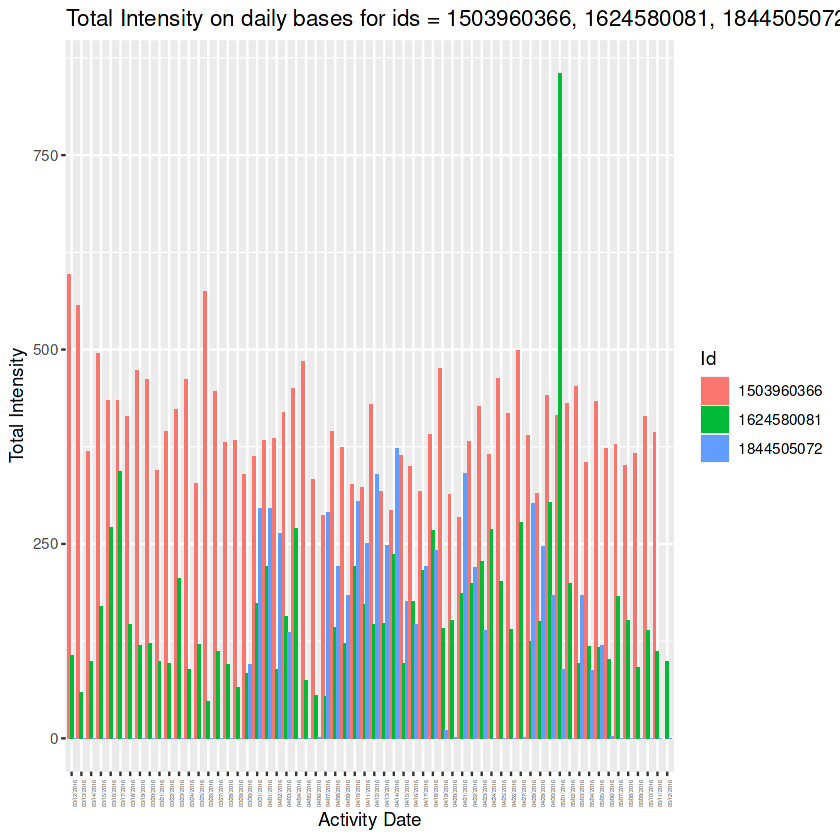

In [30]:
three_ids <- filter(full_fitabase_data, Id == '1503960366' | Id == '1624580081' | Id == '1844505072')

ggplot(three_ids, aes(fill=Id, y=TotalIntensity, x=ActivityDate)) + 
    geom_bar(position="dodge", stat="identity") +
  theme(axis.text.x = element_text(angle = 90, size = 3)) +
  labs(title = 'Total Intensity on daily bases for ids = 1503960366, 1624580081, 1844505072',
       x = 'Activity Date',
       y = 'Total Intensity')

Since this graph takes into consideration activities done daily is very difficult to appreciate the trends, not mentioning that if we include more users it will be come more difficult to understand, so in the future we would like to explore other kind of representation for all this information.

Finally, we would like to explore the questions done previously like at what time the more active people is going to sleep? And the more sedentary people are going to sleep less, why? What are they doing during the day that they do not sleep that much?

## Exporting final records

In the following we create .CSV files from `fitabase_data_1`, `fitabase_data_2`, and `full_fitabase_data` in case you want to work with those files in future analyses.

In [31]:
write.csv(fitabase_data_1, file = 'Fitabase_Data_3.12.16_4.11.16_r.csv', row.names = F)
write.csv(fitabase_data_2, file = 'Fitabase_Data_4.12.16_5.12.16_r.csv', row.names = F)

Also, we provide the full fitabase data, in case you are interested in working with all the information at the same time.

In [32]:
write.csv(full_fitabase_data, file = 'Full_Fitabase_Data_r.csv', row.names = F)